# 2022 kesätyöanalyysi indeed-sivustosta: Python-työpaikkoja

# Johdanto

Tämän projektityön tarkoituksena on harjoitella Web Scraping -teknologiaa Pythonin BeautifulSoup ja requests-moduulin avulla. Projektissa analysoidaan tämän vuoden kesätyöpaikkoja työpaikan hakukoneen Indeed avulla. 

Projekti koostuu kahdesta ipynb-tiedostosta: 
- webscraping.ipynb: Käytetään web scraping -teknologiaa ja kerätään data talteen. Tuloksena saadaan json-tiedosto, jossa Indeed-sivuston työpaikkojen esite. 
- kesätyö2022_analyysi.ipynb: Luetaan edellä saatu json-tiedosto ja analysoidaan. 

# Analyysikysymykset

1. Kuinka paljon Python liittyvää työpaikkaa tällä hetkellä on? Kuinka suuri on osuus, jossa ei tarvitaan lainkaan Pythonia vs tarvitaan Pythonia? 

2. Kuka on suurin työllistäjä (Eniten esiintymisiä Indeed-sivustossa)? 

3. Kuinka monessa työpaikassa tarvitaan Python lisäksi myös Javascript? Entä C++ ja C#? 

4. Kuinka paljon työpaikoista sisältää myös "data-analyysi" tai "data-analyytikko" avainsanoja "python" lisäksi? 

5. Kuinka paljon työpaikoista on data-analyysiin liittyvää, mutta ei tarvita Python? 

6. Missä kaupungissa esiintyy eniten Python työllistäjiä? 

# Data-analyysi

In [3]:
%matplotlib inline 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

/home/degnaiyu/.local/lib/python3.8/site-packages/pandas/compat/_optional.py:149: UserWarning: Pandas requires version '1.3.1' or newer of 'bottleneck' (version '1.2.1' currently installed).
  warnings.warn(msg, UserWarning)


## Datan luku

In [4]:
data= pd.read_json('scrapingresult.json')

In [5]:
data.head()

,Työpaikan nimike,Yritysnimi,Sijaintikunta,Seloste
0,Pizzeriatyöntekijä Kesätyö 2022 Rax Pizzabuffe...,Restel Ravintolat Oy,Helsinki,"Oletko reipas ja vastuuntuntoinen tyyppi, joka..."
1,Kesärekry - Kesätyöntekijöitä Customer Service...,JYSK,Vantaa,Yrityksen kuvaus\nHaemme kesätyöntekijöitä 30-...
2,"Myyjä (kesätyöntekijä), Kankaanpää",Musti ja Mirri Oy,Helsinki,Myyjä Kankaanpään Musti ja Mirri myymälään (ke...
3,Jäätelönmyyjä,Finncafe,Helsinki,We are looking for people who can sell ice cre...
4,"Kesätyö, 16-17-vuotiaat",Helsingin Kaupunki,Helsinki,Hei sinä 16-17-vuotias nuori!\n\n\nKaipaatko k...


## Data cleaning

In [6]:
data= data.dropna(axis=0)  #poistetaan kaikki rivit, jossa on tyhjiä arvoja
data= data.drop_duplicates(subset= ['Seloste'])   # poistetaan toistetut rivit: Näköjään indeed-sivustossa on toituvia työpaikan esitteitä 

# 1. Kysymys: 

**1. Kuinka paljon Python liittyvää työpaikkaa tällä hetkellä on? Kuinka suuri on osuus, jossa ei tarvitaan lainkaan Pythonia vs tarvitaan Pythonia?**

Seloste sarake: 

In [7]:
selosteet= data['Seloste']    #Poimitaan Seloste-sarake data-taulukosta 
selosteet.head()

0    Oletko reipas ja vastuuntuntoinen tyyppi, joka...
1    Yrityksen kuvaus\nHaemme kesätyöntekijöitä 30-...
2    Myyjä Kankaanpään Musti ja Mirri myymälään (ke...
3    We are looking for people who can sell ice cre...
4    Hei sinä 16-17-vuotias nuori!\n\n\nKaipaatko k...
Name: Seloste, dtype: object

In [8]:
selosteet_lower= selosteet.str.lower() #Seloste-sarakkeen tekstit muunnetaan pieniksi kirjaimiksi 

Näytetään tietorivejä, jossa tarvitaan Pythonia: 

In [9]:
data[selosteet_lower.str.contains('python')]

,Työpaikan nimike,Yritysnimi,Sijaintikunta,Seloste


## Johtopäätös

Tänä kesänä ei tarvita lainkaan Pythonia! 

# 2. Kysymys: 

**2. Kuka on suurin työllistäjä (Esiintyy eniten indeed sivustossa)?**

Yhteenveto kesätyöpaikoista: 

In [10]:
data.describe() 

,Työpaikan nimike,Yritysnimi,Sijaintikunta,Seloste
count,471,471,471,471
unique,431,260,43,471
top,Jäätelönmyyjä,Vantaan kaupunki,Helsinki,"Oletko reipas ja vastuuntuntoinen tyyppi, joka..."
freq,7,22,203,1


**20 yritystä, joilla on suurimmat kesätyöpaikkojen tarjonnat:** 

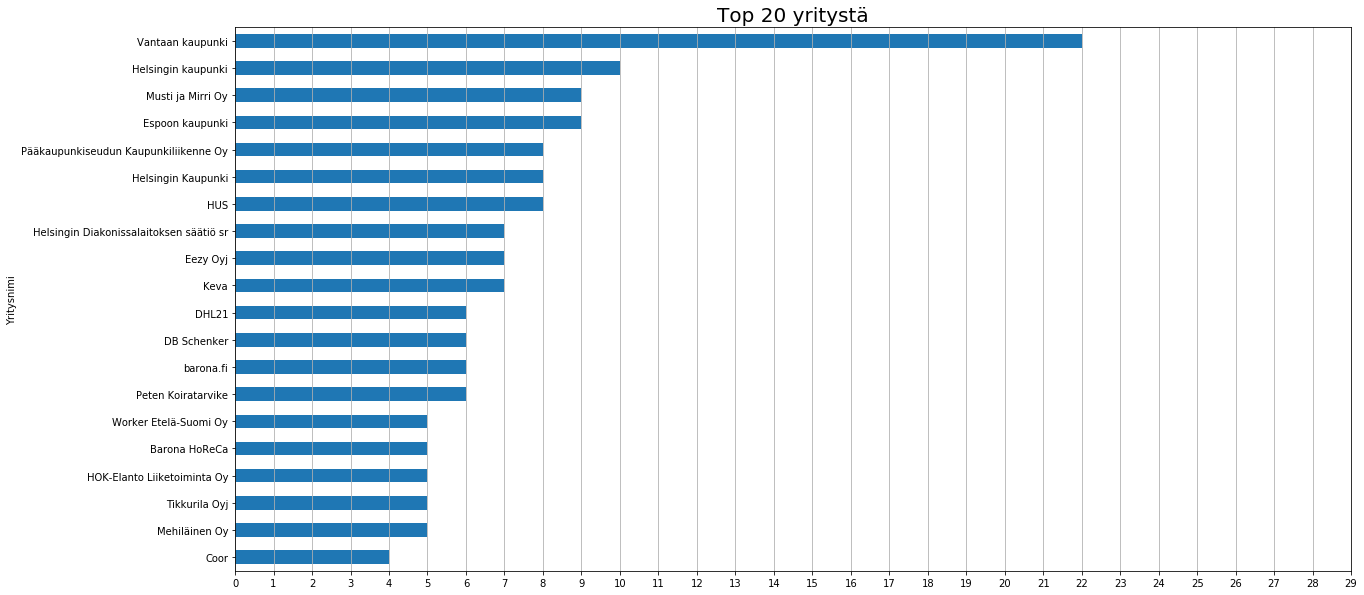

In [11]:
top20company= data.value_counts(subset= ['Yritysnimi'])[0:20]   #Poimitaan 20 yritystä, jotka tarjoavat eniten kesätyöpaikkoja 
top20company= top20company.reset_index()                        #indeksit muunnetaan tietosarakkeeksi 

#plottaus
top20company.sort_values(by= 0).plot.barh(x='Yritysnimi', y=0, legend=False, figsize=(20, 10), xticks= list(range(0, 30, 1)));   
plt.grid(axis='x')
plt.title('Top 20 yritystä', fontsize= 20)
plt.show()

**10 Kaupunkia , joilla on suurimmat kesätyöpaikkojen tarjonnat:**

In [12]:
top10city= data.value_counts(subset= ['Sijaintikunta'])[0:10]     #10 kuntaa, jotka tarjoavat eniten kesätyöpaikkoja 

top10city= top10city.reset_index() 
top10city.loc[3, 'Sijaintikunta']='Määrittämätön kunta'  #muunnetaa Suomi rivi määrittämöttömäksi kunnaksi


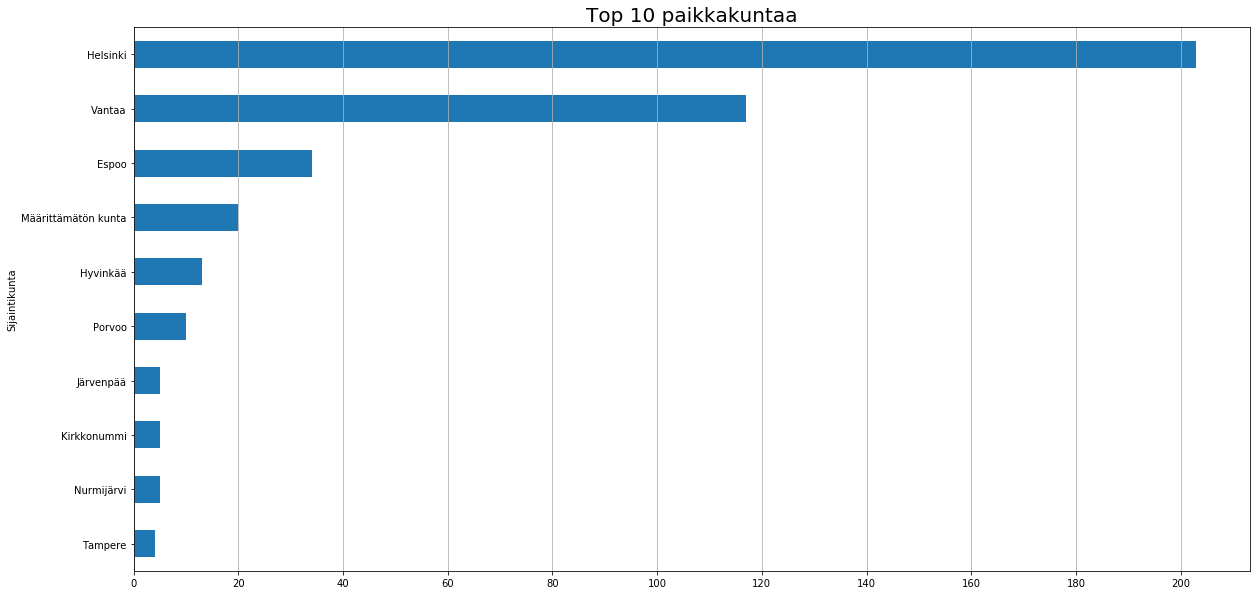

In [13]:
#Plottaus 
top10city.sort_values(by= 0).plot.barh(x='Sijaintikunta', y=0, legend=False, figsize=(20, 10), xticks= list(range(0, 210, 20))); 
plt.grid(axis='x')
plt.title('Top 10 paikkakuntaa', fontsize= 20)
plt.show()

## Johtopäätös

Voidaan tehdä seuraavat johtopäätökset: 
- yritys, joka tarjoaa eniten kesätyöpaikkoja, on Vantaan kaupunki. 
- Kunnan tasolla Helsinki on suurin työllistäjä. 
- Jäätelönmyyjiä on eniten tarjontaa tänä kesänä. 

# 3. Kysymys: 

**3. Kuinka moni tarvitsee Python lisäksi myös Javascript? Entä C++ ja C#?**

Pythonia ei tarvita 1. kysymyksen tuloksen mukaan. Analysoidaan Javascript, C++, ja C# kysyntää. 

In [14]:
selosteet_lower     #näytetään Seloste-sarake, jossa kaikki kirjaimet ovat pienellä

0      oletko reipas ja vastuuntuntoinen tyyppi, joka...
1      yrityksen kuvaus\nhaemme kesätyöntekijöitä 30-...
2      myyjä kankaanpään musti ja mirri myymälään (ke...
3      we are looking for people who can sell ice cre...
4      hei sinä 16-17-vuotias nuori!\n\n\nkaipaatko k...
                             ...                        
505    näytä lisää\ntule kesäksi töihin meille päijät...
506    onko sinulle tärkeää tehdä työtä, jolla on oik...
507    näytä lisää\nkesä tulee kovaa vauhtia. sairaan...
508    haalariharjoittelijoita pääkaupunkiseudulle\n\...
509    kesätyö: siivoojia joensuuhun\njoensuu\ncoor o...
Name: Seloste, Length: 471, dtype: object

In [15]:
data[selosteet_lower.str.contains('javascript')]       #Näytetään tietorivit, joissa on Javascript-kieltä tarvitsevia työpaikkoja 

,Työpaikan nimike,Yritysnimi,Sijaintikunta,Seloste


In [16]:
data[selosteet_lower.str.contains('c\+\+')] #Näytetään tietorivit, joissa on C++-kieltä tarvitsevia työpaikkoja 

,Työpaikan nimike,Yritysnimi,Sijaintikunta,Seloste


In [17]:
data[selosteet_lower.str.contains('c#')] #Näytetään tietorivit, joissa on C#-kieltä tarvitsevia työpaikkoja 

,Työpaikan nimike,Yritysnimi,Sijaintikunta,Seloste
467,Kesätöihin Integraatiokehittäjäksi tai Operations,Frends Technology,Espoo,Maailma ei pyöri ilman integraatioita. Me emme...


## Johtopäätös 

Löydettiin yksi työpaikka yrityksestä Frends Technology, jossa tarvitaan C#. Työpaikan nimike on integraatiokehittäjä. Javascript, Python ja C++ ei kuulu tämän kesän aiheeseen. 

# 4. Kysymys: 

**4. Kuinka paljon työpaikoista sisältää myös "data-analyysi" tai "data-analyytikko" avainsanoja "python" lisäksi?**

Etsitään avainsanat 'data-analyysi' ja 'data-analyytikko', ja jätetään python osuus huomiotta. 

In [18]:
data[selosteet_lower.str.contains('data-analyysi')]   #Näytetään tietorivit, joissa esiintyy data-analyysi-avainsanaa. 

,Työpaikan nimike,Yritysnimi,Sijaintikunta,Seloste


In [19]:
data[selosteet_lower.str.contains('data-analyytikko')] #Näytetään tietorivit, joissa esiintyy data-analyytikko-avainsanaa. 

,Työpaikan nimike,Yritysnimi,Sijaintikunta,Seloste
474,Kesätyöntekijä,Keva,Helsinki,Hae Kevaan kesätöihin!\n\nHaluatko kehittyä ty...


## Johtopäätös 

Vain yksi yritys tarvitsee data-analyysiä: Keva.  

# 5. Kysymys ja 6. kysymys: 

**5. Kuinka paljon on data-analyysiin liittyvää, mutta ei tarvitse Pythonia?**

**6. Missä kaupungissa esiintyy eniten Python työllistäjiä?**

## Johtopäätös

5.kysymys: 
4.kysymyksen johtopäätöksestä saatiin tulos, että vain yksi työpaikka tarvitsi data-analyysiä ja eikä vaatinut Python-taitoa. 

6.kysymys: 
Ei missään kunnassa esiintynyt Pythonin työllistäjiä